# Sinarmas Risk Modeling

By: Maheswara Sinatriyo

## Introduction

Bachelor in Aviation Engineering, now an aspiring Data Scientist. Was a Chairman of IULI's Student Executive boards and lead a team of 25 diverse student which helps me become a more firm, timely, and committed person. Recently completed Data Science bootcamp from Hacktiv8 and gained relevant Data Science skills and knowledge.

## Problem Statement

## External Link

## Library Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import plotly.express as px

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

seed = 1

## Data Loading

In [2]:
df = pd.read_excel('IndonesiaCreditData.xlsx')
df

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [4]:
df['Job'].unique()

array([2, 1, 3, 0], dtype=int64)

* There are several nulls in Saving Acounts and Checking Account.
* Job column should be categoric

In [5]:
df['Job'] = df['Job'].astype(str)

## Exploratory Data Analysis

### Categoric EDA

In [6]:
sex = df.groupby('Sex',as_index=False).count()[['Sex','No']]
sex.rename({'No':'Count'},axis=1,inplace=True)

fig = px.bar(sex, x='Sex', y='Count')
fig.show()

* Datasets predominantly male

In [7]:
job = df.groupby('Job',as_index=False).count()[['Job','No']]
job.rename({'No':'Count'},axis=1,inplace=True)

fig = px.bar(job, x='Job', y='Count')
fig.show()

* most users are skilled at their jobs

In [8]:
housing = df.groupby('Housing',as_index=False).count()[['Housing','No']]
housing.rename({'No':'Count'},axis=1,inplace=True)

fig = px.bar(housing, x='Housing', y='Count')
fig.show()

* most user own house

In [9]:
saving = df.groupby('Saving accounts',as_index=False).count()[['Saving accounts','No']]
saving.rename({'No':'Count'},axis=1,inplace=True)

fig = px.bar(saving, x='Saving accounts', y='Count')
fig.show()

* most user have little savings

In [10]:
checking = df.groupby('Checking account',as_index=False).count()[['Checking account','No']]
checking.rename({'No':'Count'},axis=1,inplace=True)

fig = px.bar(checking, x='Checking account', y='Count')
fig.show()

* the checking accounts of users are equally divided between little and moderate with a small fraction of rich account

In [11]:
pupose = df.groupby('Purpose',as_index=False).count()[['Purpose','No']]
pupose.rename({'No':'Count'},axis=1,inplace=True)

fig = px.bar(pupose, x='Purpose', y='Count')
fig.show()

Most users want to credit or Car or Radio/TV

### Numeric

In [12]:
df

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


In [13]:
fig = px.histogram(df, x="Age")
fig.show()
fig = px.box(df, x="Age")
fig.show()

In [14]:
fig = px.histogram(df, x="Credit amount")
fig.show()
fig = px.box(df, x="Credit amount")
fig.show()

In [15]:
fig = px.histogram(df, x="Duration")
fig.show()
fig = px.box(df, x="Duration")
fig.show()

All the data has outliers, thus we will be using minmax scaler.

## Data Preprocessing

### Null Handling

Based on previous exploration, it is likely that the Nulls in saving and checking accounts means 0 or none (below little). Thus we will change the value to 'None'

In [16]:
# df.dropna(inplace=True)

In [17]:
df.replace(np.nan,'None',inplace=True)

In [18]:
df.isnull().any()

No                  False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
dtype: bool

### Numeric Categoric Split

In [19]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').drop('No',axis=1).columns.tolist()

df_cat = df[cat_cols]
df_num = df[num_cols]

### Encode

In [20]:
ohe = OneHotEncoder(sparse=False)

In [21]:
encoded_data = ohe.fit_transform(df_cat)
encoded_data = pd.DataFrame(encoded_data)
encoded_data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Scaling

In [24]:
scaler = MinMaxScaler()

In [25]:
scaled_data = scaler.fit_transform(df_num)
scaled_data = pd.DataFrame(scaled_data,columns=num_cols)
scaled_data

,Age,Credit amount,Duration
0,0.857143,0.050567,0.029412
1,0.053571,0.313690,0.647059
2,0.535714,0.101574,0.117647
3,0.464286,0.419941,0.558824
4,0.607143,0.254209,0.294118
...,...,...,...
995,0.214286,0.081765,0.117647
996,0.375000,0.198470,0.382353
997,0.339286,0.030483,0.117647
998,0.071429,0.087763,0.602941


### Concat

In [26]:
df_use = pd.DataFrame([])
df_use = pd.concat([encoded_data,scaled_data],axis=1)
df_use

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,Age,Credit amount,Duration
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.857143,0.050567,0.029412
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.053571,0.313690,0.647059
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.535714,0.101574,0.117647
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.464286,0.419941,0.558824
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.607143,0.254209,0.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.214286,0.081765,0.117647
996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375000,0.198470,0.382353
997,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.339286,0.030483,0.117647
998,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.071429,0.087763,0.602941


### PCA

In [27]:
pca = PCA(n_components=29).fit(df_use)

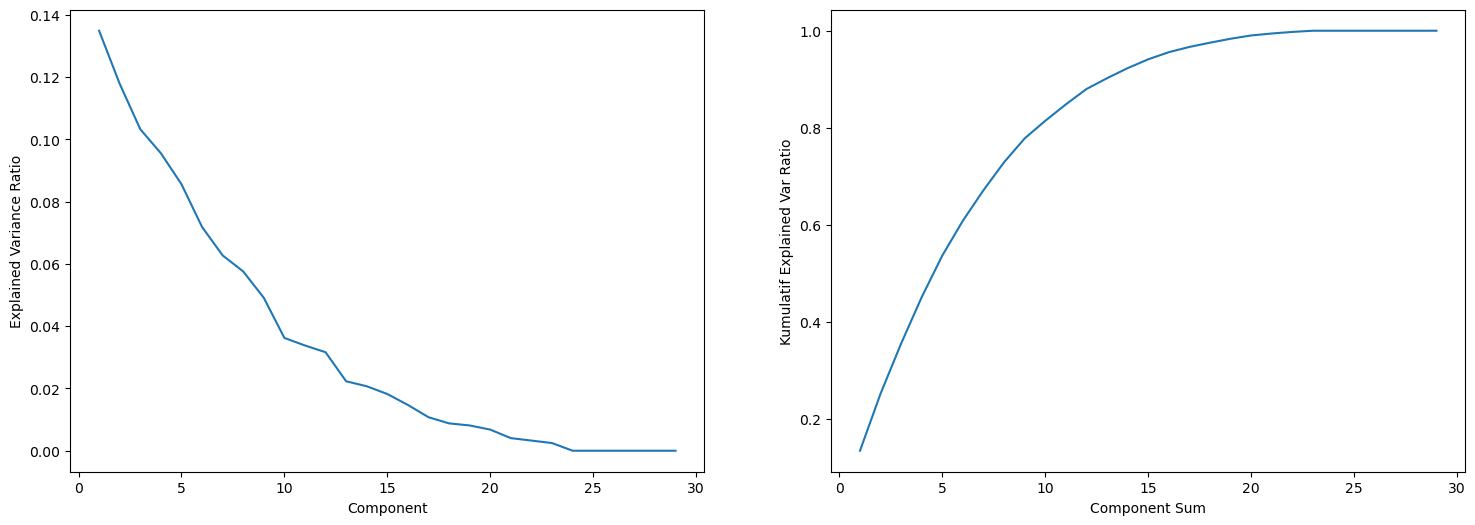

In [28]:
fig,ax=plt.subplots(ncols=2, figsize=(18, 6))
ax[0].plot(range(1,30), pca.explained_variance_ratio_)
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,30), np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Component Sum')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

In [29]:
pca = PCA(n_components=0.8).fit(df_use)

In [30]:
pca.explained_variance_ratio_

array([0.13485695, 0.11782461, 0.10323902, 0.09552233, 0.08559303,
       0.071857  , 0.06271363, 0.05756759, 0.04910422, 0.03621581])

In [31]:
pca.fit(df_use)

PCA(n_components=0.8)

In [32]:
df_pca = pca.transform(df_use)

## Model Selection

Algorithm : K-Means Clustering, DBSCAN, and Gaussian Mixture

## Model Training

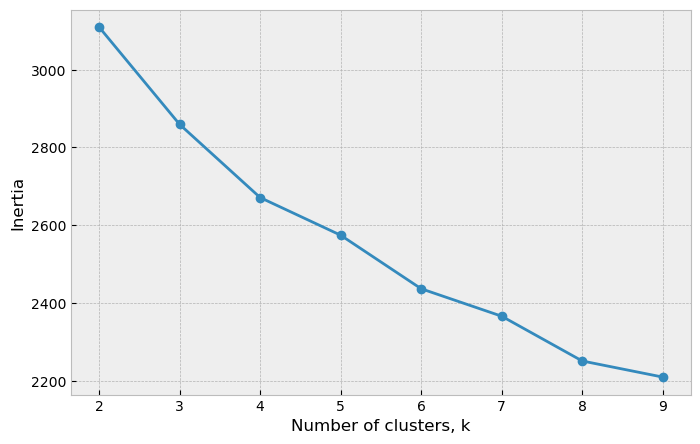

In [33]:
#check the optimal k value with base params (Algo: lloyd)
ks = range(2, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k,algorithm='auto')
    model.fit(df_use)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [34]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=seed).fit(df_use)
                for k in range(2, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [35]:
silhouette_scores = [silhouette_score(df_use, model.labels_)
                     for model in kmeans_per_k[1:]]

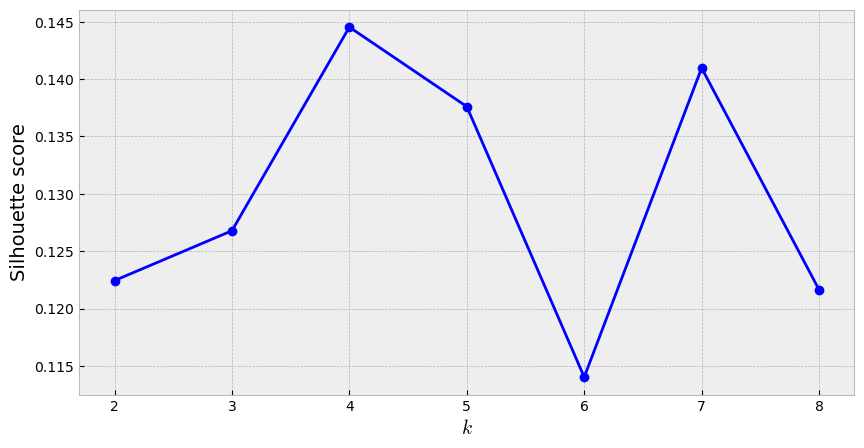

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 9), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

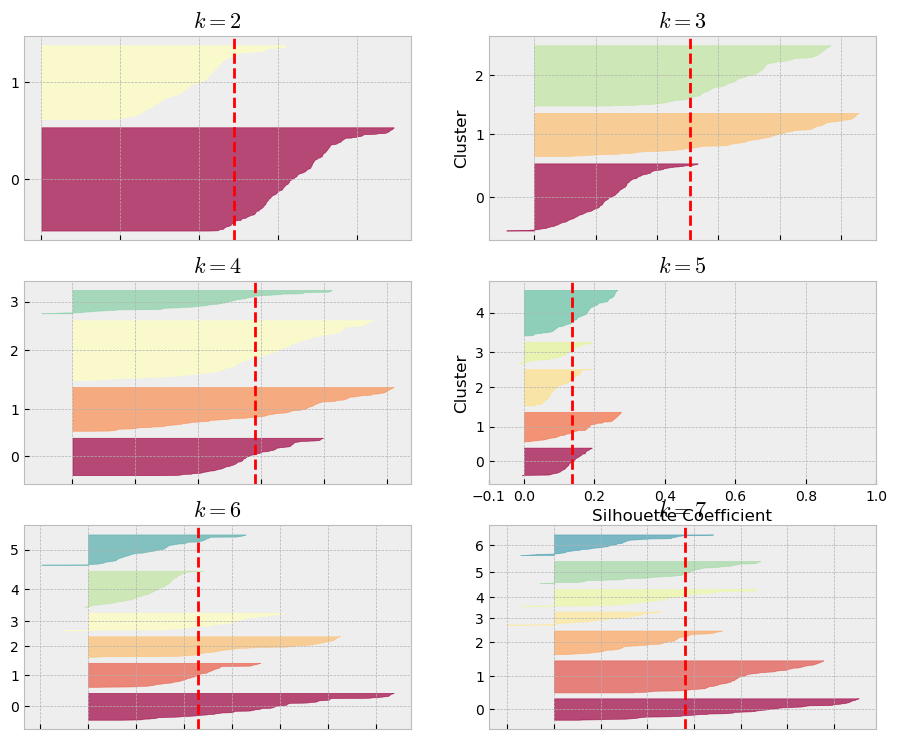

In [37]:
plt.figure(figsize=(11, 9))

for k in (2,3,4,5,6,7):
    plt.subplot(3,2,k-1)

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(df_use, y_pred)

    padding = len(df_use) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = pl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
        facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel('Cluster')
    if k in (5,10):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)

plt.show()

In [38]:
clusters = 7

### Kmeans

In [39]:
kmeans = KMeans(n_clusters=clusters)

In [40]:
kmeans.fit(df_use)

KMeans(n_clusters=7)

In [41]:
labels_kmc = kmeans.labels_

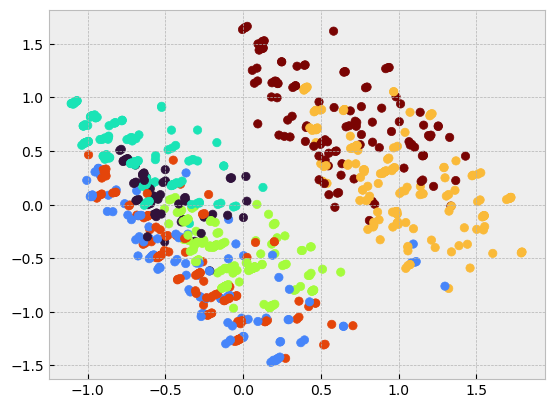

In [42]:
plt.scatter(df_pca[:,0],df_pca[:,1],c=labels_kmc,cmap='turbo')

#### K Means Algo elkan

inertia :  2353.2278536037447


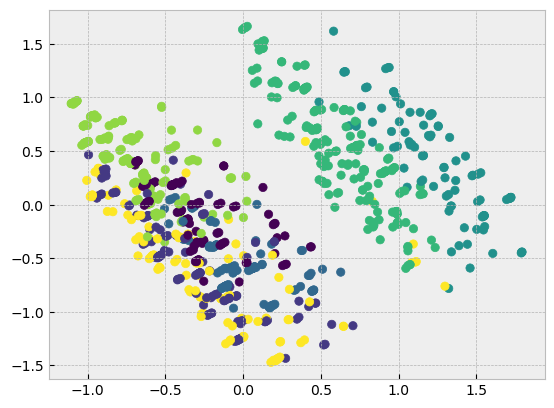

In [43]:
kmeans_elkan = KMeans(n_clusters=clusters,algorithm='elkan',random_state=seed)

kmeans_elkan.fit(df_use)

print('inertia : ', kmeans_elkan.inertia_)

labels_kmc_elkan = kmeans_elkan.labels_
labels_kmc_elkan

plt.scatter(df_pca[:,0],df_pca[:,1],c=labels_kmc_elkan,cmap='viridis')

It seems that based on visualization alone, there is no difference between Lloyd algorithm and Elkan algorithm for this dataset

### DBSCAN

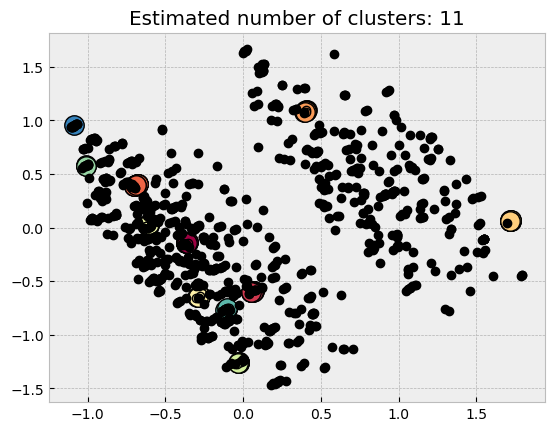

In [44]:
# Compute DBSCAN
dbscan_model = DBSCAN(eps=0.3, min_samples=10).fit(df_use)
core_samples_mask = np.zeros_like(dbscan_model.labels_, dtype=bool)
core_samples_mask[dbscan_model.core_sample_indices_] = True
labels = dbscan_model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Gaussian Mixture

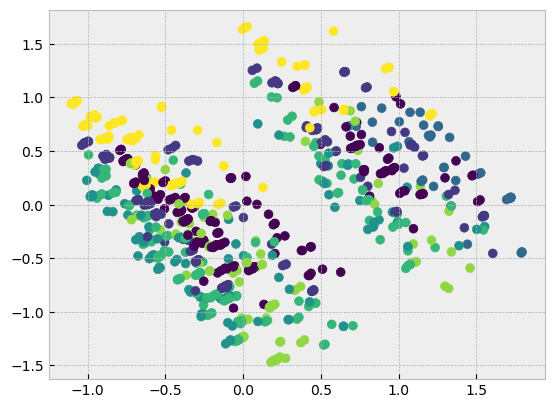

In [45]:
# Gaussian Covariance full
gmm_full = GaussianMixture(n_components=clusters,covariance_type='full',random_state=seed).fit(df_use)
labels_gmm_full = gmm_full.predict(df_use)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_gmm_full, s=40, cmap='viridis');

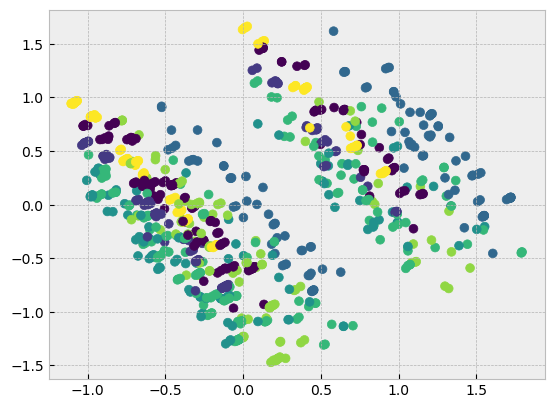

In [46]:
# Gaussian Covariance tied
gmm_tied = GaussianMixture(n_components=clusters,covariance_type='tied',random_state=seed).fit(df_use)
labels_gmm_tied = gmm_tied.predict(df_use)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_gmm_tied, s=40, cmap='viridis');

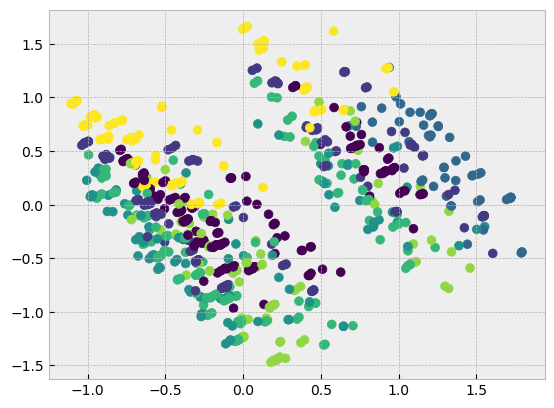

In [47]:
# Gaussian Covariance diag
gmm_diag = GaussianMixture(n_components=clusters,covariance_type='diag',random_state=seed).fit(df_use)
labels_gmm_diag = gmm_diag.predict(df_use)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_gmm_diag, s=40, cmap='viridis');

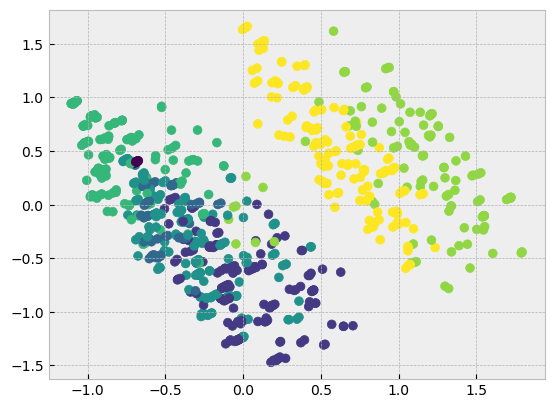

In [48]:
# Gaussian Covariance spherical
gmm_spher = GaussianMixture(n_components=clusters,covariance_type='spherical',random_state=seed).fit(df_pca)
labels_gmm_spher = gmm_spher.predict(df_pca)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_gmm_spher, s=40, cmap='viridis');

## Model Comparison

In [49]:
comparison = pd.DataFrame({'Method' : ['K-Means Elkan','DBSCAN','Gaussian Mixture Full', 'Gaussian Mixture Tied', 'Gaussian Mixture Diag','Gaussian Mixture Sphere'],
                  'Silhouette Score' : [silhouette_score(df_pca, labels_kmc_elkan),silhouette_score(df_pca, dbscan_model.labels_), silhouette_score(df_pca, labels_gmm_full), silhouette_score(df_pca, labels_gmm_tied), silhouette_score(df_pca, labels_gmm_diag),silhouette_score(df_pca, labels_gmm_spher)]
                  })
comparison

,Method,Silhouette Score
0,K-Means Elkan,0.153510
1,DBSCAN,-0.148732
2,Gaussian Mixture Full,0.121410
3,Gaussian Mixture Tied,0.123277
4,Gaussian Mixture Diag,0.127049
5,Gaussian Mixture Sphere,0.100674


## Clusters Analysis

In [50]:
fin_labels = pd.DataFrame(labels_kmc_elkan,columns=['label'])
df_fin = pd.concat([df,fin_labels],axis=1)
df_fin.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
0,0,67,male,2,own,None,little,14494431,6,radio/TV,5
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV,4
2,2,49,male,1,own,little,None,25988304,12,education,1
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment,2
4,4,53,male,2,free,little,little,60383130,24,car,2


In [51]:
label = df_fin.groupby('label',as_index=False).count()[['label','No']]
label.rename({'No':'Count'},axis=1,inplace=True)

fig = px.bar(label, x='label', y='Count')
fig.show()

most user is on cluster 4 while cluster 3 has the smallest population.

In [52]:
fig = px.histogram(df_fin, x="Sex",color='label',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Job",color='label',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Housing",color='label',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Saving accounts",color='label',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Checking account",color='label',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Purpose",color='label',barmode='group')
fig.show()

In [53]:
fig = px.histogram(df_fin, x="Age",color='label')
fig.show()
fig = px.box(df_fin, x="Age",color='label')
fig.show()

In [54]:
fig = px.histogram(df_fin, x="Credit amount",color='label')
fig.show()
fig = px.box(df_fin, x="Credit amount",color='label')
fig.show()

In [55]:
fig = px.histogram(df_fin, x="Duration",color='label')
fig.show()
fig = px.box(df_fin, x="Duration",color='label')
fig.show()

Label Characteristics:

0. Male, Average job level, Own house, small savings, moderate to rich checking, for TV/Business/Edu, Early 30s, Average cerdit amount, average duration.
1. Male, Low job level, Possibly own house, various savings, various checking, for Repairs, Mid 30s, Low credit amount, Low duration.
2. Male, Average job level, Free housing, Little saving, Little Checking, For Furniture, Mid 30s, Average credit, Long duration
3. Female, Average job level, Rent house, Little saving, Little to moderate checking, for furniture, Early 20s, Low credit, Average duration
4. Female, Average job level, Own house, Little saving, Various checking, for TV/Car/Edu, Early 30s, Low Credit, Average Duration.
5. Male, Average job, Own house, Moderate to rich saving, Moderate checking, Car/TV/Business, Mid 30s, Low credit, Medium duration. 
6. Male, High job, Free/Own house, Little saving, Various Checking, Car/Vacation, Late 30s, High credit, Long duration. 

Based on the cluster tendencies, we can conclude that:

0. Good risk because have rich checking and the credit is okay.
1. Good risk since only for repairs and have low credit and duration.
2. Bad risk, little money, furniture are expensive, and bad duration.
3. Bad risk, little money, furniture but no house.
4. Good risk, various checking, good credit.
5. Good risk, Rich, good credit.
6. Bad risk, despite high job, low money and bad credit.

In [56]:
myList = []
for i in range(len(df_fin)):
    if df_fin['label'][i] in [0,1,4,5]:
        myList.append('Good')
    else:
        myList.append('Bad')

df_fin['Risk'] = myList

In [57]:
df_fin

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label,Risk
0,0,67,male,2,own,None,little,14494431,6,radio/TV,5,Good
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV,4,Good
2,2,49,male,1,own,little,None,25988304,12,education,1,Good
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment,2,Bad
4,4,53,male,2,free,little,little,60383130,24,car,2,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,None,21524664,12,furniture/equipment,4,Good
996,996,40,male,3,own,little,little,47822943,30,car,6,Bad
997,997,38,male,2,own,little,None,9968796,12,radio/TV,0,Good
998,998,23,male,2,free,little,little,22876155,45,radio/TV,2,Bad


In [59]:
fig = px.histogram(df_fin, x="Sex",color='Risk',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Job",color='Risk',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Housing",color='Risk',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Saving accounts",color='Risk',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Checking account",color='Risk',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Purpose",color='Risk',barmode='group')
fig.show()
fig = px.histogram(df_fin, x="Age",color='Risk')
fig.show()
fig = px.box(df_fin, x="Age",color='Risk')
fig.show()

fig = px.histogram(df_fin, x="Credit amount",color='Risk')
fig.show()
fig = px.box(df_fin, x="Credit amount",color='Risk')
fig.show()
fig = px.histogram(df_fin, x="Duration",color='Risk')
fig.show()
fig = px.box(df_fin, x="Duration",color='Risk')
fig.show()

## Conclusion and Recommendation

In conclusion, Risk analysis modeling has been successfully created. The model used are K means as it has the best performance over other algorithm. There was 7 initial cluster, but after further analysis these cluster are classified into 2 label which represent good risk and bad risk.

There are a lot of confusion in the data, such as duration and credit amount. This is not clear wether these data represent the credit the use has or the amount of credit the user is going to borrow.